In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,8)})
sns.set_style("dark")

lnks = 14
nd = "nyc_10_15/"

In [2]:
def map_hex(s):
    if s.isdigit():
        return s
    else:
        return str(ord(s) - ord('a') + 10)

In [5]:
df = {}
def run(vl):
    ps = json.load(open(f"/home/manoj/sdn/onos-apps/gru_data/test/{nd}{vl}/portstats.txt"))
    lks = json.load(open(f"/home/manoj/sdn/onos-apps/gru_data/test/{nd}{vl}/links.txt"))

    ps_dt = {}
    for i in ps:
        dv = i["deviceId"]
        ps_dt[dv] = {}
        for j in i["portStats"]:
            ps_dt[dv][j['port']] = j['bytesTx'] + j['bytesRx']

    dt = {}
    # works with number of nodes less than 16
    for i in lks:
        s = map_hex(i["src"]["device"][-1])
        d = map_hex(i["dst"]["device"][-1])
        dt[str(s)+"-"+str(d)] = ps_dt[i["src"]["device"]][i["src"]["port"]]
    
    keys = list(dt.keys())
    keys.sort()
    df["links"] = keys
    vals = [float(dt[k]) for k in keys]
    df[vl] = vals

In [6]:
run("gru")
run("dij")

In [7]:
len(df["gru"]) ,len(df["dij"])

(58, 58)

In [9]:
df= pd.DataFrame(df)
df.to_csv(f"/home/manoj/sdn/onos-apps/gru_data/test/{nd}/weight_anal/link_vol.csv" , index=False)
df.head()

,links,gru,dij
0,1-11,550882208.0,444337704.0
1,1-3,237705448.0,230918217.0
2,1-4,776364251.0,755205308.0
3,1-5,183673.0,182617.0
4,1-9,766803197.0,675791467.0


In [11]:
df = pd.read_csv(f"/home/manoj/sdn/onos-apps/gru_data/test/{nd}/weight_anal/link_vol.csv" )

In [12]:
dfm = pd.melt(df, id_vars="links", var_name="method", value_name="value")
dfm = dfm.sort_values("links")
dfm.head()

,links,method,value
0,1-11,gru,550882208.0
58,1-11,dij,444337704.0
1,1-3,gru,237705448.0
59,1-3,dij,230918217.0
2,1-4,gru,776364251.0


[Text(0.5, 1.0, 'Link Volume graph'), Text(0, 0.5, 'Volume Value')]

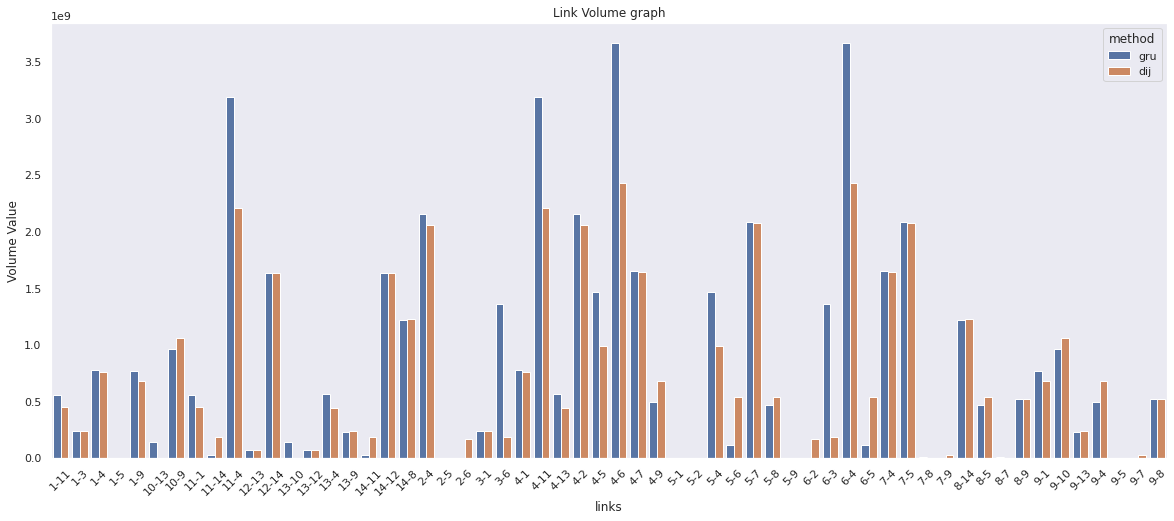

In [16]:
plt.xticks(rotation=45)
sns.barplot(data = dfm , x ="links" , y ="value" , hue="method").set(title="Link Volume graph" , ylabel="Volume Value")